<a href="https://www.kaggle.com/code/husseinandia/sprints-e-commerce-analytics?scriptVersionId=216827123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This package provides conversion functions between ISO country names, country-codes, and continent names.
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.1 MB/s eta 0:00:00


In [2]:
import numpy as np 
import pandas as pd 
import datetime as dt
import pycountry_convert as pc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("/kaggle/input/fd-ds/data.csv", encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%m/%d/%Y %H:%M")
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
nan_percentage = data['CustomerID'].isnull().mean() * 100
print(f"Percentage of missing CustomerID values: {nan_percentage:.2f}%")

Percentage of missing CustomerID values: 24.93%


#### Almost 25% of the *CustomerID* values are nan so it wouldn't be good removing them and lost alot of data.

In [9]:
# Assign value start with U for Unknown to our missing 'CustomerID' based on the Invoice Number
data["CustomerID"].fillna("U"+data["InvoiceNo"], inplace=True)

<ipython-input-9-65580f235136>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['U536414' 'U536544' 'U536544' ... 'U581498' 'U581498' 'U581498']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data["CustomerID"].fillna("U"+data["InvoiceNo"], inplace=True)


### Discovering more about InvoiceNo and negative values

In [10]:
# Getting the 'UnitPrice' & 'Quantity' numbers less than or equal to zero and delete them
neg_quan_num = (data['Quantity'] < 0).sum()
neg_price_num = (data['UnitPrice']<= 0).sum()

print(f"Number of UnitPrice & Quantity to delete ({neg_price_num}, {neg_quan_num})")

Number of UnitPrice & Quantity to delete (2517, 10624)


In [11]:
neg_quan = data[data['Quantity'] <= 0]
neg_quan

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
neg_price = data[data['UnitPrice'] < 0]
neg_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,UA563186,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,UA563187,United Kingdom



#### 1. The negative values in *Quantity* are product returns, refund or cancelled orders. Their *InvoiceNo* begins with C.
#### 2. For *UnitPrice*, we have only 2 negative values with other zero values that won't be useful for us.


In [13]:
positive_data = data[data['Quantity'] > 0]
positive_data = positive_data[positive_data['UnitPrice'] > 0]

positive_data[['Quantity', 'UnitPrice']].describe([.25, .5, .75, .99])

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
99%,100.000000,16.980000
max,80995.000000,13541.330000


In [14]:
# Trying to view max and min UnitPrice, and also max Quantity
max_quan = positive_data.nlargest(10, 'Quantity')
max_price = positive_data.nlargest(10, 'UnitPrice')
min_price = positive_data.nsmallest(6, 'UnitPrice')

df = pd.concat([max_price, min_price, max_quan], ignore_index=True, axis=0) 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.330,U537632,United Kingdom
1,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.060,UA563185,United Kingdom
2,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.750,16029.0,United Kingdom
3,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.170,U562955,United Kingdom
4,560373,M,Manual,1,2011-07-18 12:30:00,4287.630,U560373,United Kingdom
5,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536.0,France
6,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536.0,France
7,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744.0,Singapore
8,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502.0,United Kingdom
9,567353,M,Manual,1,2011-09-19 16:14:00,2653.950,U567353,Hong Kong


In [15]:
# Get the StockCode with letters only 
char_code = data[data['StockCode'].str.fullmatch(r'[A-Za-z]+')]
stock_code = char_code.loc[:, ['StockCode', 'Description']]
stock_code['Count'] = stock_code.groupby('StockCode')['StockCode'].transform('count')
sort_char_code = stock_code.drop_duplicates('StockCode').sort_values(by='Count', ascending=False).reset_index(drop=True)

sort_char_code

,StockCode,Description,Count
0,POST,POSTAGE,1256
1,DOT,DOTCOM POSTAGE,710
2,M,Manual,571
3,D,Discount,77
4,S,SAMPLES,63
5,AMAZONFEE,AMAZON FEE,34
6,CRUK,CRUK Commission,16
7,DCGSSGIRL,GIRLS PARTY BAG,13
8,DCGSSBOY,BOYS PARTY BAG,11
9,PADS,PADS TO MATCH ALL CUSHIONS,4


In [16]:
# Delete the negative and zero prices & Create new column for total sales
data = data[data['UnitPrice'] > 0]
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

In [17]:
# We are grouping quantity with the date and take abs of negative values to plot them.
# We also create a total sales dataframe 
sales = data.loc[:, ['InvoiceDate', 'Quantity', 'UnitPrice', 'TotalSales']]
sales['InvoiceDate'] = sales['InvoiceDate'].dt.to_period('M')

total_sales = sales.copy()

sales['NegQuantity'] = np.where(sales['Quantity'] < 0, abs(sales['Quantity']), 0)
sales['PosQuantity'] = np.where(sales['Quantity'] > 0, sales['Quantity'], 0)
sales.drop(['Quantity', 'UnitPrice', 'TotalSales'], axis=1, inplace=True)
sales = sales.groupby('InvoiceDate').sum()
sales

,NegQuantity,PosQuantity
InvoiceDate,,
2010-12,16042,359239
2011-01,79845,387785
2011-02,2871,283555
2011-03,5395,377526
2011-04,13645,308815
2011-05,5868,395738
2011-06,7362,389213
2011-07,6028,401759
2011-08,12346,421770


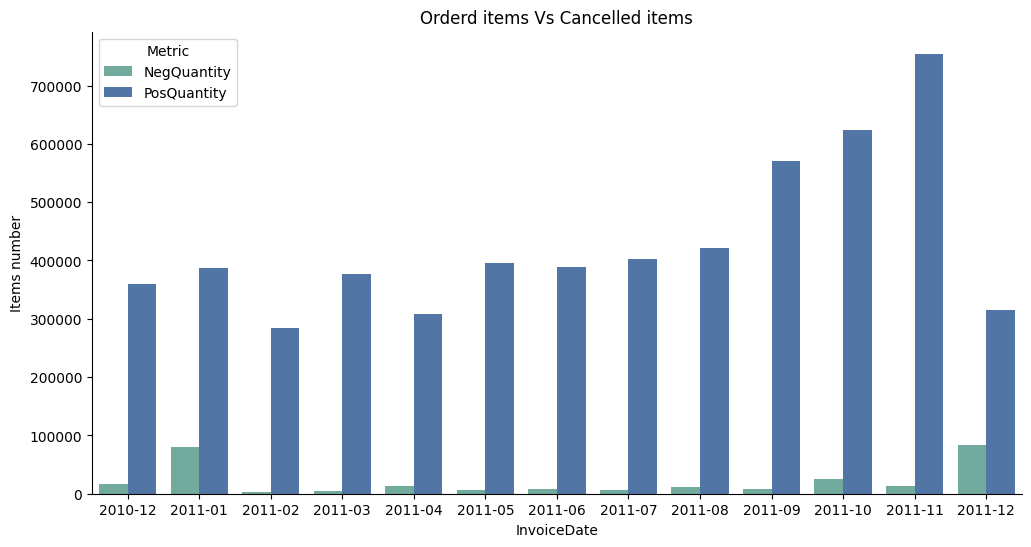

In [18]:
sales.reset_index(inplace=True)
melted_df = sales.melt(id_vars='InvoiceDate', var_name='Metric', value_name='Value')

colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
 
plt.figure(figsize=(12, 6)) 

ax = sns.barplot(
    x="InvoiceDate", 
    y="Value", 
    hue="Metric", 
    data=melted_df)

# Customize the axes and title
ax.set_title("Orderd items Vs Cancelled items")
ax.set_ylabel("Items number")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


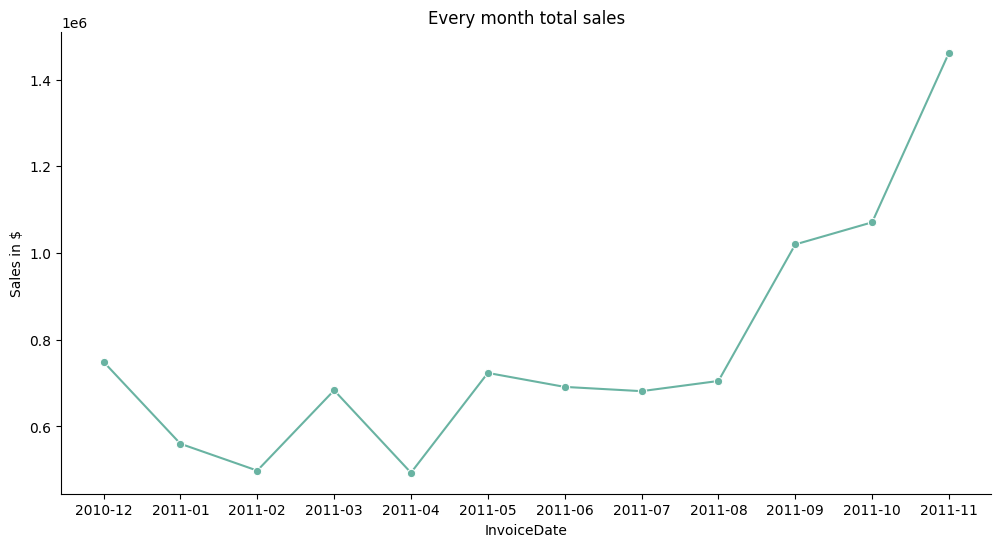

In [19]:
total_sales = total_sales.groupby('InvoiceDate').sum(['TotalSales'])
total_sales = total_sales.reset_index().drop(['Quantity', 'UnitPrice'], axis=1)

total_sales = total_sales[:-1]

plt.figure(figsize=(12, 6)) 
ax = sns.lineplot(x=total_sales['InvoiceDate'].astype(str),
             y=total_sales['TotalSales'],
             marker='o')

ax.set_title("Every month total sales")
ax.set_ylabel("Sales in $")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


* #### We removed the last month as we only have 9 days from it.
* #### We noticed that the total sales has increased a lot in the last 3 months.


In [20]:
# Month over Month Growth rate in percentage
total_sales['%Change'] = round(total_sales['TotalSales'].pct_change() * 100, 2)
total_sales

,InvoiceDate,TotalSales,%Change
0,2010-12,748957.020,NaN
1,2011-01,560000.260,-25.23
2,2011-02,498062.650,-11.06
3,2011-03,683267.080,37.18
4,2011-04,493207.121,-27.82
5,2011-05,723333.510,46.66
6,2011-06,691123.120,-4.45
7,2011-07,681300.111,-1.42
8,2011-08,704804.630,3.45
9,2011-09,1019687.622,44.68


In [21]:
# The most frequently 10 descriptions
data['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2365
REGENCY CAKESTAND 3 TIER              2198
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1726
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

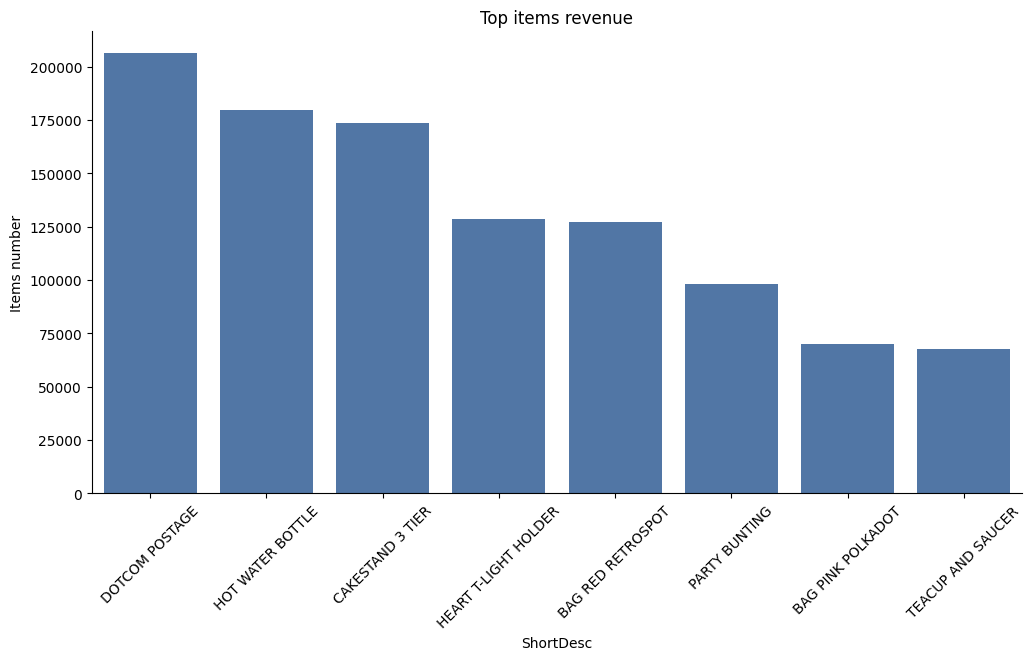

In [22]:
# Get the last 3 words from the 'Description'
data['ShortDesc'] = data['Description'].str.split().str[-3:].str.join(' ')
items_revenue = data.groupby('ShortDesc')['TotalSales'].sum()
top_items = items_revenue.sort_values(ascending=False).reset_index().head(8)

plt.figure(figsize=(12, 6)) 

ax = sns.barplot(
    x="ShortDesc", 
    y="TotalSales",  
    data=top_items,
    color='#4374B3')

# Customize the axes and title
ax.set_title("Top items revenue")
ax.set_ylabel("Items number")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', rotation=45)

In [23]:
top_items

,ShortDesc,TotalSales
0,DOTCOM POSTAGE,206245.48
1,HOT WATER BOTTLE,179641.67
2,CAKESTAND 3 TIER,173816.39
3,HEART T-LIGHT HOLDER,128449.88
4,BAG RED RETROSPOT,127253.34
5,PARTY BUNTING,98302.98
6,BAG PINK POLKADOT,70037.41
7,TEACUP AND SAUCER,67542.43


In [24]:
# Function to find the continent for each country
def country_continent(x):
    custom = {'Channel Islands': 'Europe'}
    try:
        if x in custom:
            return custom[x]
        else:
            country_code = pc.country_name_to_country_alpha2(x, cn_name_format="default")
            country_continent_code = pc.country_alpha2_to_continent_code(country_code)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
    except:
        return x

# Replace Éire with Ireland as it is the Irish language name for it.
data['Country'] = data['Country'].replace({'EIRE':'Ireland', 'RSA':'South Africa'})
data['Continent'] = data['Country'].apply(country_continent)

country_info = data.groupby(['Country', 'Continent']).agg(
    Unique_InvoiceNo=('InvoiceNo', 'nunique'),     # Count unique items
    TotalSales=('TotalSales', 'sum'),         # Sum sales
    Quantity=('Quantity', 'sum')    # Sum quantity
).sort_values(by='TotalSales', ascending=False).reset_index()

fig = px.scatter(country_info[3:], x="TotalSales", y="Quantity",
	          size="Unique_InvoiceNo", color="Continent", 
              hover_name="Country", log_x=True)
fig.show()


* #### Due to huge difference in values between the countries, some of them don't appear clearly on the scatter plot.
* #### I removed the top 3 countries to view the chart more clearly.


In [25]:
# Compare the 'TotalSales' for the top 15 countries.
fig = px.bar(country_info[:15], y='TotalSales', x='Country', text='TotalSales')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [26]:
# Show the last 15 items
country_info.tail(15)

,Country,Continent,Unique_InvoiceNo,TotalSales,Quantity
23,Unspecified,Unspecified,13,4749.79,3300
24,Greece,Europe,6,4710.52,1556
25,Iceland,Europe,7,4310.00,2458
26,Canada,North America,6,3666.38,2763
27,Malta,Europe,10,2505.47,944
28,United Arab Emirates,Asia,3,1902.28,982
29,USA,North America,7,1730.92,1034
30,Lebanon,Asia,1,1693.88,386
31,Lithuania,Europe,4,1661.06,652
32,European Community,European Community,5,1291.75,497


In [27]:
continent_info = country_info.groupby('Continent')[['Unique_InvoiceNo', 'Quantity', 'TotalSales']].sum().sort_values(by='TotalSales', ascending=False).reset_index()

fig = px.pie(continent_info, values='Quantity', names='Continent',
             title='Quantity by Continent',hover_data=['Unique_InvoiceNo'], 
             labels={'Unique_InvoiceNo':'Unique Orders'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [28]:
continent_info

,Continent,Unique_InvoiceNo,Quantity,TotalSales
0,Europe,23602,5171562,9539502.144
1,Oceania,69,83345,137077.270
2,Asia,92,47594,79707.890
3,North America,13,3797,5397.300
4,Unspecified,13,3300,4749.790
5,European Community,5,497,1291.750
6,South America,1,356,1143.600
7,Africa,1,351,1002.310
